# In this notebook we explore the datasets that are used to develop the target variables of our project.

## Business License Applications (DOB data)

## Building Permits (DCA data)

## Rent prices (Zillow data)

## Using these we also develop the Gentrification Index, which in this notebook is refered to as renovation_index_with_rent

## The last date these data sets were downloaded was in June 2018

In [1]:
import pandas as pd
import pylab as pl
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp
from sklearn.linear_model import LogisticRegression

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploring Business licenses 

In [2]:
licenses = pd.read_csv("License_Applications.csv")

In [3]:
licenses.shape

(224163, 25)

In [4]:
licenses.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1  33312-2016-RELE    2010590-DCA     Business                Renewal   
2  33701-2016-RELE    2025971-DCA     Business                Renewal   
3   1223-2017-RHIS    1217547-DCA   Individual                Renewal   
4  20143-2017-ALAU    2064612-DCA     Business            Application   

            Business Name  Status  Start Date    End Date  \
0            PEYKO TZENOV  Issued  01/09/2017  01/10/2017   
1  T-MOBILE NORTHEAST LLC  Issued  12/28/2016  01/07/2017   
2   LUCAS ELECTRONICS INC  Issued  12/31/2016  01/10/2017   
3     JUSTINIANO SALDIVAR  Issued  01/09/2017  01/10/2017   
4            LEUNG, WAI M  Issued  12/26/2017  01/09/2018   

  Temp Op Letter Issued Temp Op Letter Expiration       ...       Unit Type  \
0                   NaN                       NaN       ...             NaN   
1                   NaN                       NaN       ...             NaN   
2                   NaN                       NaN       ...             NaN   
3                   NaN                       NaN       ...             NaN   
4                   NaN                       NaN       ...             NaN   

  Unit Description       City State    Zip Contact Phone  Longitude  \
0  NaN         NaN      BRONX    NY  10467    9178047161 -73.877091   
1  NaN         NaN   BROOKLYN    NY  11201    8009279801 -73.987746   
2  NaN         NaN   BROOKLYN    NY  11222  347-987-3235 -73.954098   
3  NaN         NaN  GLEN OAKS    NY  11004    7189748124        NaN   
4  NaN         NaN   BROOKLYN    NY  11223    6464672890 -73.960942   

    Latitude Active Vehicles  
0  40.876214             NaN  
1  40.691630             NaN  
2  40.729869             NaN  
3        NaN             NaN  
4  40.594763             NaN  

[5 rows x 25 columns]

In [5]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [6]:
type(licenses["Start Date"].iloc[1])

str

In [7]:
licenses['Start Date'] = pd.to_datetime(licenses['Start Date'])

In [8]:
licenses["Start Date"].describe()

count                  224163
unique                   4640
top       2017-02-28 00:00:00
freq                      784
first     1998-04-10 00:00:00
last      2018-03-29 00:00:00
Name: Start Date, dtype: object

# We are only interested in the data between January 2013 and December 2017, therefor we only include the licenses applied for in that period of time.

In [9]:
licenses = licenses[licenses["Start Date"]>'12/31/2012']
licenses = licenses[licenses["Start Date"]<'01/01/2018']

In [10]:
licenses["Start Date"].describe()

count                  160442
unique                   1626
top       2017-02-28 00:00:00
freq                      784
first     2013-01-02 00:00:00
last      2017-12-31 00:00:00
Name: Start Date, dtype: object

# We also load the Zip Code shapefile in order to being able to map our results

In [11]:
zip_ref = zipfile.ZipFile("ZIP_CODE.zip", 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("census_tracts.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [12]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
ct = gp.GeoDataFrame.from_file("geo_export_04e27bfe-654f-460f-beae-1bb88eaacb66.shp")

# We load the NYC choropleth developed by Dr. Federica Bianco, which for the location of the legends is a nicer way to map NYC

In [13]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

In [14]:
zipcodes.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

## Quick visualization of where the Businesses licenses aplications are located 

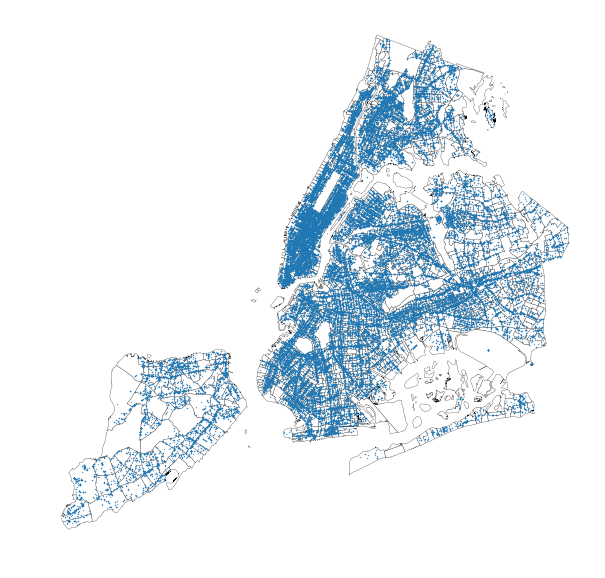

In [15]:

cp.choroplethNYC(ct, column=None, color="white", edgecolor="black", lw=0.25);

pl.scatter(licenses.Longitude, licenses.Latitude, s=0.1)


# We groupby zip code so we have the count of the busniness licenses by zip  

In [16]:
countzip = licenses.groupby(licenses["Zip"]).count()

In [17]:
countzip.head()

Application ID  License Number  License Type  Application or Renewal  \
Zip                                                                           
00                  1               1             1                       1   
000                11              11            11                      11   
00000               9               8             9                       9   
00623               1               1             1                       1   
00637               2               2             2                       2   

       Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
Zip                                                                         
00                 1       1           1         1                      0   
000               11      11          11        11                      0   
00000              9       9           9         9                      0   
00623              1       1           1         1                      0   
00637              2       2           2         2                      0   

       Temp Op Letter Expiration       ...         Street 2  Unit Type  Unit  \
Zip                                    ...                                     
00                             0       ...                0          0     0   
000                            0       ...                0          0     0   
00000                          0       ...                0          0     2   
00623                          0       ...                0          0     0   
00637                          0       ...                0          0     0   

       Description  City  State  Contact Phone  Longitude  Latitude  \
Zip                                                                   
00               1     1      1              1          0         0   
000              6    11     11             11          4         4   
00000            2     9      9              8          3         3   
00623            0     1      1              1          0         0   
00637            0     2      2              2          0         0   

       Active Vehicles  
Zip                     
00                   0  
000                  0  
00000                0  
00623                0  
00637                0  

[5 rows x 24 columns]

In [18]:
countzip["Zip"] = countzip.index
countzip["Zips"] = countzip.Zip

In [19]:
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

# Transform into geodataframe

In [20]:
zips_ = gp.GeoDataFrame(zips)

In [21]:
licenses.head(1)

Application ID License Number License Type Application or Renewal  \
0  1066-2017-RHIC    1294131-DCA     Business                Renewal   

  Business Name  Status Start Date    End Date Temp Op Letter Issued  \
0  PEYKO TZENOV  Issued 2017-01-09  01/10/2017                   NaN   

  Temp Op Letter Expiration       ...       Unit Type Unit Description   City  \
0                       NaN       ...             NaN  NaN         NaN  BRONX   

  State    Zip Contact Phone  Longitude   Latitude Active Vehicles  
0    NY  10467    9178047161 -73.877091  40.876214             NaN  

[1 rows x 25 columns]

# We do some data exploration of the total number of business licenses by Zip Code

In [22]:
zips.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1247            1201          1247                    1247   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1247    1247        1247      1241                      9   

   Temp Op Letter Expiration  \
0                          9   

                         ...                          POPULATION  \
0                        ...                             22413.0   

           AREA  STATE    COUNTY  ST_FIPS  CTY_FIPS                   URL  \
0  1.779494e+07     NY  New York       36       061  http://www.usps.com/   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0         0.0        0.0  POLYGON ((981958.6472873986 213464.4530421346,...  

[1 rows x 39 columns]

Text(0.5,1,'Distribution of number of Business licenses by zip code')

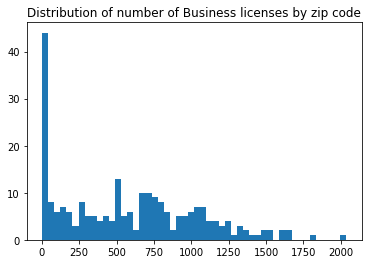

In [23]:
pl.hist(zips["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [24]:
zips1 = zips[zips["License Type"]>0]

Text(0.5,1,'Distribution of number of Business licenses by zip code')

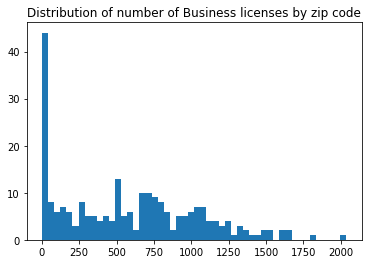

In [25]:
pl.hist(zips1["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [26]:
type(zips.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [27]:
type(zips_.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [28]:
zips_.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1247            1201          1247                    1247   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1247    1247        1247      1241                      9   

   Temp Op Letter Expiration  \
0                          9   

                         ...                          POPULATION  \
0                        ...                             22413.0   

           AREA  STATE    COUNTY  ST_FIPS  CTY_FIPS                   URL  \
0  1.779494e+07     NY  New York       36       061  http://www.usps.com/   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0         0.0        0.0  POLYGON ((981958.6472873986 213464.4530421346,...  

[1 rows x 39 columns]

# Number of total business licenses by zip code

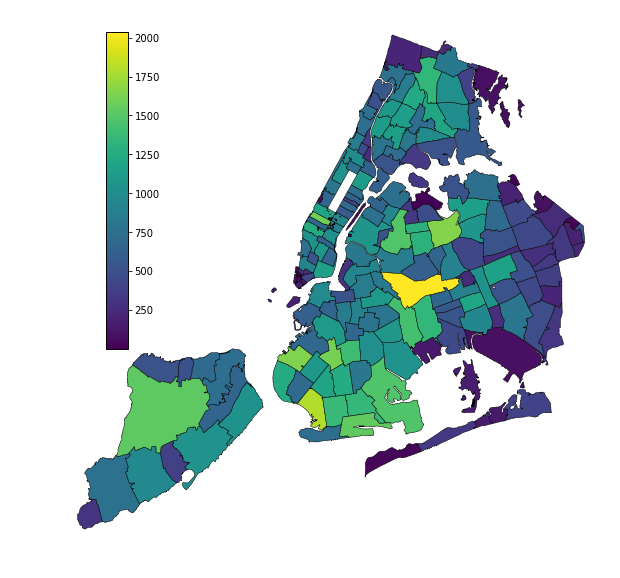

In [29]:


cp.choroplethNYC(zips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);



# Here the general overview is over, we need to start looking for specific types of licenses to see if we get something better.

In [30]:
licenses.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1  33312-2016-RELE    2010590-DCA     Business                Renewal   
2  33701-2016-RELE    2025971-DCA     Business                Renewal   
3   1223-2017-RHIS    1217547-DCA   Individual                Renewal   
4  20143-2017-ALAU    2064612-DCA     Business            Application   

            Business Name  Status Start Date    End Date  \
0            PEYKO TZENOV  Issued 2017-01-09  01/10/2017   
1  T-MOBILE NORTHEAST LLC  Issued 2016-12-28  01/07/2017   
2   LUCAS ELECTRONICS INC  Issued 2016-12-31  01/10/2017   
3     JUSTINIANO SALDIVAR  Issued 2017-01-09  01/10/2017   
4            LEUNG, WAI M  Issued 2017-12-26  01/09/2018   

  Temp Op Letter Issued Temp Op Letter Expiration       ...       Unit Type  \
0                   NaN                       NaN       ...             NaN   
1                   NaN                       NaN       ...             NaN   
2                   NaN                       NaN       ...             NaN   
3                   NaN                       NaN       ...             NaN   
4                   NaN                       NaN       ...             NaN   

  Unit Description       City State    Zip Contact Phone  Longitude  \
0  NaN         NaN      BRONX    NY  10467    9178047161 -73.877091   
1  NaN         NaN   BROOKLYN    NY  11201    8009279801 -73.987746   
2  NaN         NaN   BROOKLYN    NY  11222  347-987-3235 -73.954098   
3  NaN         NaN  GLEN OAKS    NY  11004    7189748124        NaN   
4  NaN         NaN   BROOKLYN    NY  11223    6464672890 -73.960942   

    Latitude Active Vehicles  
0  40.876214             NaN  
1  40.691630             NaN  
2  40.729869             NaN  
3        NaN             NaN  
4  40.594763             NaN  

[5 rows x 25 columns]

In [31]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [32]:
licenses["Application or Renewal"].unique()

array(['Renewal', 'Application'], dtype=object)

In [33]:
print("Start date max and min:")
print (licenses["Start Date"].min())
print (licenses["Start Date"].max())





Start date max and min:
2013-01-02 00:00:00
2017-12-31 00:00:00


# Exploring Licenses for New Businesses

In [34]:
newlicenses = licenses[licenses["Application or Renewal"]== "Application"]

In [35]:
ncountzip = newlicenses.groupby(licenses["Zip"]).count()
ncountzip["Zip"] = ncountzip.index

nzips = pd.merge(ncountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

nzips_ = gp.GeoDataFrame(nzips)

# Number of new licenses by zip code

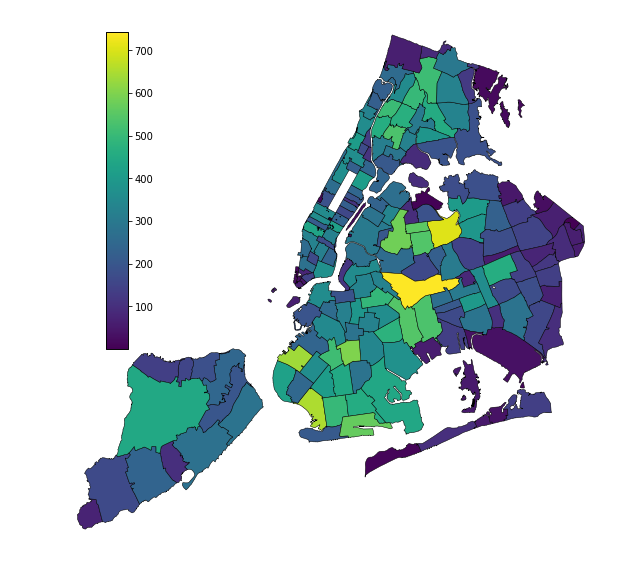

In [36]:
cp.choroplethNYC(nzips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring Renewal Licenses

In [37]:
oldlicenses = licenses[licenses["Application or Renewal"]== "Renewal"]

In [38]:
ocountzip = oldlicenses.groupby(licenses["Zip"]).count()
ocountzip["Zip"] = ocountzip.index

ozips = pd.merge(ocountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

ozips_ = gp.GeoDataFrame(ozips)

In [39]:
type(ocountzip.Zip.iloc[1])

str

# Number of renewal licenses by zip code

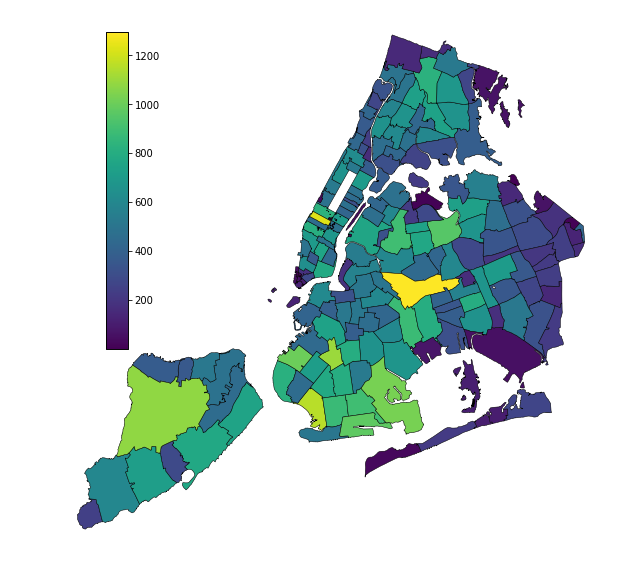

In [40]:
cp.choroplethNYC(ozips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Devide new / old

In [41]:
ozips["count_old"] = ozips["License Type"]
nzips["count_new"] = nzips["License Type"]
nzips["geometry"].drop

<bound method NDFrame.drop of 0      POLYGON ((981958.6472873986 213464.4530421346,...
1      POLYGON ((991339.8703228086 207576.7837151289,...
2      POLYGON ((989830.469142139 207048.1263078749, ...
3      POLYGON ((981197.408652395 196571.0816452205, ...
4      POLYGON ((972696.8446168154 193014.5477478057,...
5      POLYGON ((977542.4500830621 188447.2783390433,...
6      POLYGON ((971218.3702115566 190710.8587856293,...
7      POLYGON ((982595.6794779003 195880.7536295503,...
8      POLYGON ((981136.3431577235 198082.3837407082,...
9      POLYGON ((980538.9073447287 200658.5114624649,...
10     POLYGON ((991606.4032543153 205494.1464762092,...
11     POLYGON ((987500.0003778934 210146.4376965463,...
12     POLYGON ((986378.4337233901 210178.5990495533,...
13     POLYGON ((985200.0558308065 205072.0203519613,...
14     POLYGON ((983216.1014653891 203868.9381124675,...
15     POLYGON ((983985.4854253083 205856.7261316329,...
16     POLYGON ((989286.3432618976 213322.780097127, ...
1

In [42]:
df = pd.merge(ozips,nzips,on="Zip")

In [43]:
df.head(1)

Application ID_x  License Number_x  License Type_x  \
0               813               813           813.0   

   Application or Renewal_x  Business Name_x  Status_x  Start Date_x  \
0                       813              813       813           813   

   End Date_x  Temp Op Letter Issued_x  Temp Op Letter Expiration_x  \
0         811                        6                            6   

     ...            AREA_y  STATE_y  COUNTY_y  ST_FIPS_y  CTY_FIPS_y  \
0    ...      1.779494e+07       NY  New York         36         061   

                  URL_y  SHAPE_AREA_y  SHAPE_LEN_y  \
0  http://www.usps.com/           0.0          0.0   

                                          geometry_y  count_new  
0  POLYGON ((981958.6472873986 213464.4530421346,...      434.0  

[1 rows x 77 columns]

In [44]:
df["n/o"] = df["count_new"]/df["count_old"]

df_ = gp.GeoDataFrame(df)

In [45]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

In [46]:
df_["geometry"] = df_["geometry_x"]

# Number of new licenses / renewal licenses. (Not very clear patterns, next map shows by quantiles)

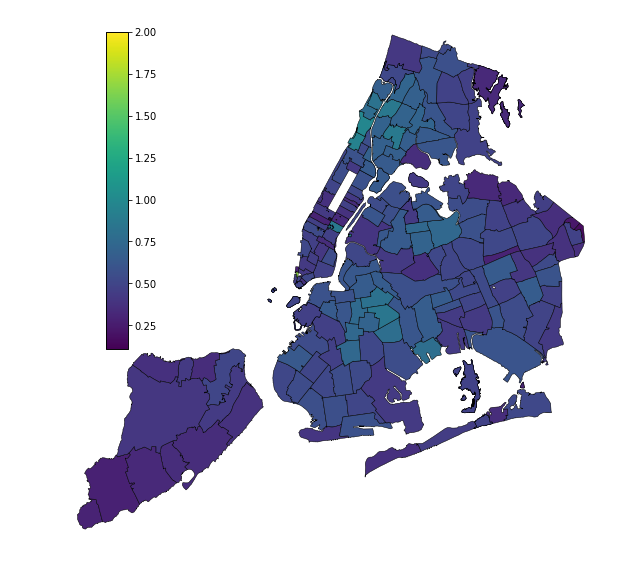

In [47]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# We have a nice distribution of our Business Renewal indicator (So far known as n/o)

(array([  2.,  14.,  36.,  63.,  71.,  41.,  14.,   6.,   5.,   4.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   3.]),
 array([ 0.11111111,  0.20555556,  0.3       ,  0.39444444,  0.48888889,
         0.58333333,  0.67777778,  0.77222222,  0.86666667,  0.96111111,
         1.05555556,  1.15      ,  1.24444444,  1.33888889,  1.43333333,
         1.52777778,  1.62222222,  1.71666667,  1.81111111,  1.90555556,  2.        ]),
 <a list of 20 Patch objects>)

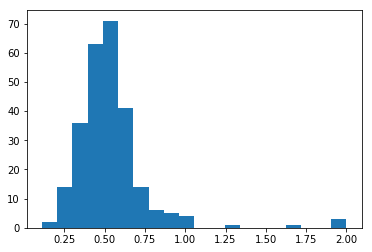

In [48]:
pl.hist(df_["n/o"], bins=20)

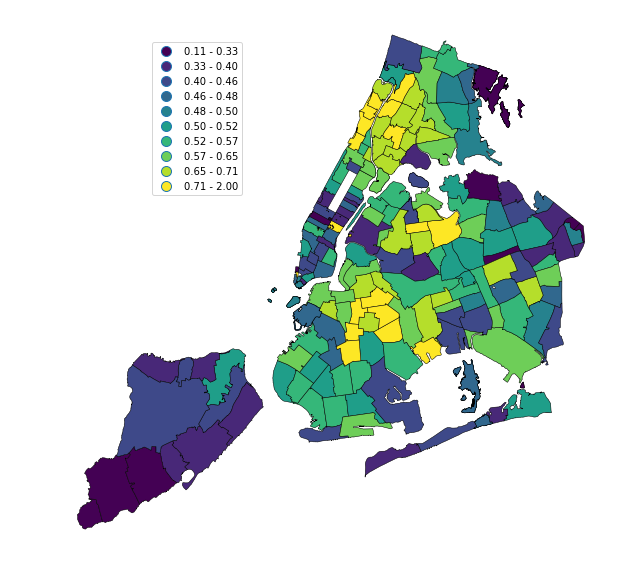

In [49]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");

In [52]:
zips_.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1247            1201        1247.0                    1247   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1247    1247        1247      1241                      9   

   Temp Op Letter Expiration  \
0                          9   

                         ...                          POPULATION  \
0                        ...                             22413.0   

           AREA  STATE    COUNTY  ST_FIPS  CTY_FIPS                   URL  \
0  1.779494e+07     NY  New York       36       061  http://www.usps.com/   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0         0.0        0.0  POLYGON ((981958.6472873986 213464.4530421346,...  

[1 rows x 39 columns]

In [53]:
zips_["density"] = zips_["License Type"]/zips_["AREA"]
zips_["per_capita"] = zips_["License Type"]/zips_["POPULATION"]

In [54]:
zips0_ = zips_[zips_["per_capita"]<0.4]

(array([ 187.,    5.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  6.18835058e-07,   8.71691816e-05,   1.73719528e-04,
          2.60269875e-04,   3.46820221e-04,   4.33370568e-04,
          5.19920914e-04,   6.06471261e-04,   6.93021607e-04,
          7.79571954e-04,   8.66122300e-04]),
 <a list of 10 Patch objects>)

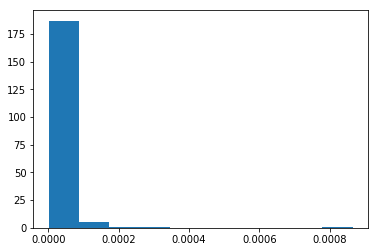

In [55]:
pl.hist(zips0_.density)

# Exploring number of business licenses contoled by area and population. First by area

In [56]:
#cp.choroplethNYC(zips2_, column="density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Now population

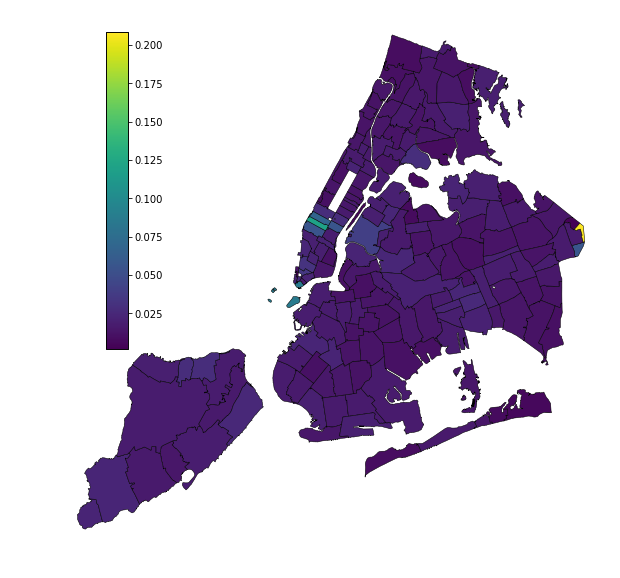

In [57]:
cp.choroplethNYC(zips0_, column="per_capita", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [58]:
zips_.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles', 'Zip',
       'Zips', 'ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'density', 'per_capita'],
      dtype='object')

In [59]:
zips_["zip_density"] = zips_["POPULATION"] / zips_["AREA"]

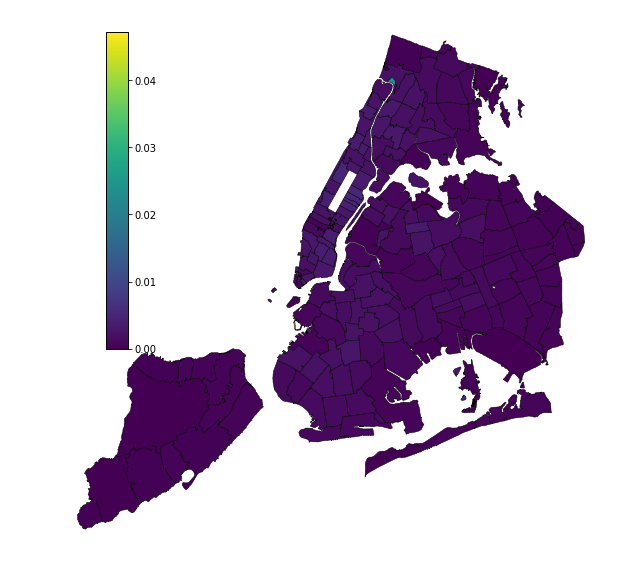

In [60]:
cp.choroplethNYC(zips_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# We also want to look at some general characteristics of the Zip Codes, so we explore population, area and density.

# Descriptive population, density and area by CT

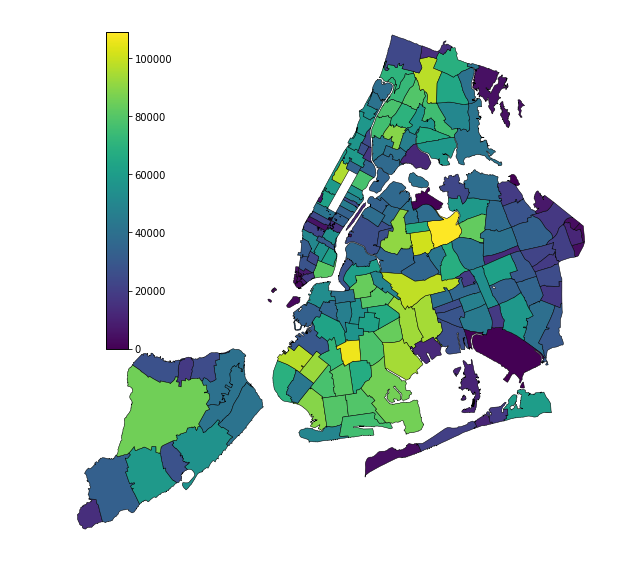

In [61]:
cp.choroplethNYC(zips_, column="POPULATION", color="k",cmap="viridis", edgecolor="k", lw=0.5);

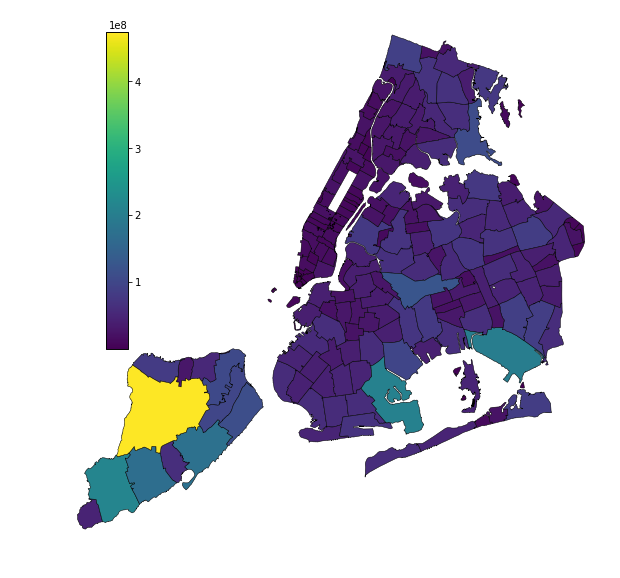

In [62]:
cp.choroplethNYC(zips_, column="AREA", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Now we move on to exploring building permits

In [64]:
licenses = pd.read_csv("DOB_Permit_Issuance.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,8,9,10,15,31,33,34,35,36,39,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
licenses.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

In [66]:
licenses.head()

BOROUGH    Bin # House #       Street Name      Job #  Job doc. #  \
0   BROOKLYN  3326733    1070  EAST  104 STREET  301064023           1   
1   BROOKLYN  3322563     230    HANCOCK STREET  302036375           1   
2  MANHATTAN  1040756     504       PARK AVENUE  100209846           1   
3  MANHATTAN  1036459     570  LEXINGTON AVENUE  101464835           1   
4  MANHATTAN  1015847      25         W. 32 ST.  122488478           1   

  Job Type Self_Cert Block Lot              ...                \
0       A2         Y  8230   1              ...                 
1       A1         Y  1838  43              ...                 
2       A3       NaN  1374  36              ...                 
3       A2       NaN  1305  60              ...                 
4       A2         Y   834  26              ...                 

  Owner’s House State  Owner’s House Zip Code  Owner's Phone #  \
0                  NY                   11101       7184728000   
1                  NV                   11225              NaN   
2                  NY                   10017       2127542310   
3                  NY                   10022       2125571100   
4                  NY                   11354       9178283018   

               DOBRunDate PERMIT_SI_NO   LATITUDE  LONGITUDE COUNCIL_DISTRICT  \
0  11/03/2017 12:00:00 AM      1238812  40.644203 -73.892264             46.0   
1  11/03/2017 12:00:00 AM      2471045  40.682849 -73.947219             36.0   
2  11/03/2017 12:00:00 AM       191966  40.763075 -73.969695              4.0   
3  11/03/2017 12:00:00 AM       679627  40.756925 -73.972066              4.0   
4  11/03/2017 12:00:00 AM      3044504  40.747535 -73.986372              4.0   

  CENSUS_TRACT                       NTA_NAME  
0        986.0                       Canarsie  
1        249.0                        Bedford  
2      11401.0  Upper East Side-Carnegie Hill  
3        100.0        Turtle Bay-East Midtown  
4         76.0          Midtown-Midtown South  

[5 rows x 60 columns]

# Again we are only interested in the data between 2013 and 2017, given the data volume, we use the Issuance date, which is more complete than Job Start Date, and makes more sense than Expiration Date

In [67]:
licenses['Issuance Date'] = pd.to_datetime(licenses['Issuance Date'])

In [68]:
licenses['Issuance Date'].describe() 
#licenses['Expiration Date'] .describe()
#licenses['Job Start Date'].describe()

count                 3323573
unique                   8104
top       2017-03-29 00:00:00
freq                     1096
first     1989-05-11 00:00:00
last      2018-04-04 00:00:00
Name: Issuance Date, dtype: object

In [69]:
licenses = licenses[licenses["Issuance Date"]>'12/31/2012']
licenses = licenses[licenses["Issuance Date"]<'01/01/2018']

In [70]:
licenses['Issuance Date'].describe() 

count                  901173
unique                   1711
top       2017-03-29 00:00:00
freq                     1096
first     2013-01-01 00:00:00
last      2017-12-31 00:00:00
Name: Issuance Date, dtype: object

In [71]:
countzip = licenses.groupby(licenses["Zip Code"]).count()

In [72]:
countzip["Zip"] = countzip.index.astype(int)
countzip["Zips"] = countzip["Zip"].astype(str)
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
zips_ = gp.GeoDataFrame(zips)

# We check the different type of licenses that can be expedited and compare with the meta data to know what it means

In [73]:
print (licenses["Residential"].unique())
print (licenses["Job Type"].unique())
print (licenses["Bldg Type"].unique())

[nan 'YES']
['A2' 'NB' 'A3' 'A1' 'DM' 'SG']
[  2.   1.  nan]


nan - YES, it compares between residential buildings and those who are not.

the Job Type is related to the type of permit, NB stands for New Building, DM for Demolition, A1 is a major renovation, A2 and A3 correspond to renovations that do not change the structure nor the use of the building.

the Building Type variable corresponds to the size of the building, it applies just to residential buildings, 2 is for buildings that are over three families and 1 to buildings under three families.

# We use these categories to do some exploration

In [74]:
Residential_licenses = licenses[licenses["Residential"]=="YES"]
Non_Residential_licenses = licenses[licenses["Residential"]!="YES"]

big_bldg = licenses[licenses["Bldg Type"]==2]
small_bldg = licenses[licenses["Bldg Type"]==1]

In [75]:
new_buildings = licenses[licenses["Job Type"]=="NB"]
major_renovation = licenses[licenses["Job Type"]=="A1"]

In [76]:
countzip.head(5)

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
Zip Code                                                                      
0.0            32     32       32           32     32          32        32   
4452.0          8      8        8            8      8           8         8   
10000.0        27     27       27           27     27          27        27   
10001.0     17003  17003    17003        17003  17003       17003     17003   
10002.0     10066  10066    10066        10066  10066       10066     10066   

          Self_Cert  Block    Lot  ...    Owner's Phone #  DOBRunDate  \
Zip Code                           ...                                  
0.0              32     32     32  ...                 32          32   
4452.0            8      8      8  ...                  8           8   
10000.0          26     27     27  ...                 27          27   
10001.0       16804  17003  17003  ...              17003       17003   
10002.0        9881  10066  10066  ...              10066       10066   

          PERMIT_SI_NO  LATITUDE  LONGITUDE  COUNCIL_DISTRICT  CENSUS_TRACT  \
Zip Code                                                                      
0.0                 32        32         32                32            32   
4452.0               8         0          0                 0             0   
10000.0             27        27         27                27            27   
10001.0          17003     16996      16996             16996         16996   
10002.0          10066     10061      10061             10061         10061   

          NTA_NAME    Zip   Zips  
Zip Code                          
0.0             32      0      0  
4452.0           0   4452   4452  
10000.0         27  10000  10000  
10001.0      16996  10001  10001  
10002.0      10061  10002  10002  

[5 rows x 61 columns]

In [77]:
#cp.choroplethNYC(zips_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring just residential Licenses

In [78]:
countres = Residential_licenses.groupby(Residential_licenses["Zip Code"]).count()

In [79]:
countres["Zip"] = countres.index.astype(int)
countres["Zips"] = countres["Zip"].astype(str)
res = pd.merge(countres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
res_ = gp.GeoDataFrame(res)

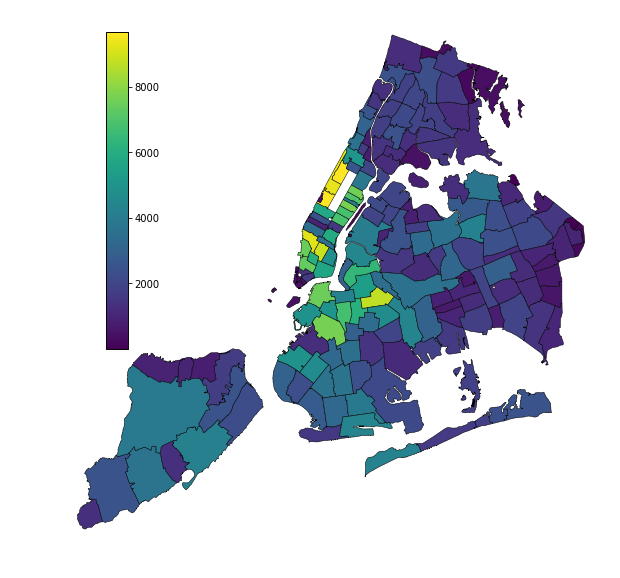

In [80]:
cp.choroplethNYC(res_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Non residential Bldgs

In [81]:
countnonres = Non_Residential_licenses.groupby(Non_Residential_licenses["Zip Code"]).count()

In [82]:
countnonres["Zip"] = countnonres.index.astype(int)
countnonres["Zips"] = countnonres["Zip"].astype(str)
nonres = pd.merge(countnonres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nonres_ = gp.GeoDataFrame(nonres)

In [83]:
Non_Residential_licenses.head()

BOROUGH    Bin # House #    Street Name      Job #  Job doc. # Job Type  \
4   MANHATTAN  1015847      25      W. 32 ST.  122488478           1       A2   
8      QUEENS  4311785   87-77  PARSONS BLVD.  440154440           1       A2   
13  MANHATTAN  1089326      49     ANN STREET  120029511           1       A2   
21     QUEENS  4200517  118-04        101 AVE  420829125           1       A2   
24  MANHATTAN  1014236     282     7TH AVENUE  121895280           2       A2   

   Self_Cert Block Lot                ...                 Owner’s House State  \
4          Y   834  26                ...                                  NY   
8          Y  9765  41                ...                                  NY   
13         N    92  14                ...                                  NY   
21         N  9486   2                ...                                  NY   
24         Y   776  40                ...                                  NY   

    Owner’s House Zip Code  Owner's Phone #              DOBRunDate  \
4                    11354       9178283018  11/03/2017 12:00:00 AM   
8                    11354       7183539000  11/03/2017 12:00:00 AM   
13                   10018       2123343338  11/03/2017 12:00:00 AM   
21                   11420       7184407199  11/03/2017 12:00:00 AM   
24                   10001       2122177904  11/03/2017 12:00:00 AM   

   PERMIT_SI_NO   LATITUDE  LONGITUDE COUNCIL_DISTRICT CENSUS_TRACT  \
4       3044504  40.747535 -73.986372              4.0         76.0   
8       2745274  40.707312 -73.802539             24.0      44602.0   
13      2833706  40.710306 -74.006828              1.0       1501.0   
21      2573400  40.689746 -73.826697             28.0        106.0   
24      2696921  40.746147 -73.994168              3.0         95.0   

                             NTA_NAME  
4               Midtown-Midtown South  
8                             Jamaica  
13  Battery Park City-Lower Manhattan  
21                   South Ozone Park  
24              Midtown-Midtown South  

[5 rows x 60 columns]

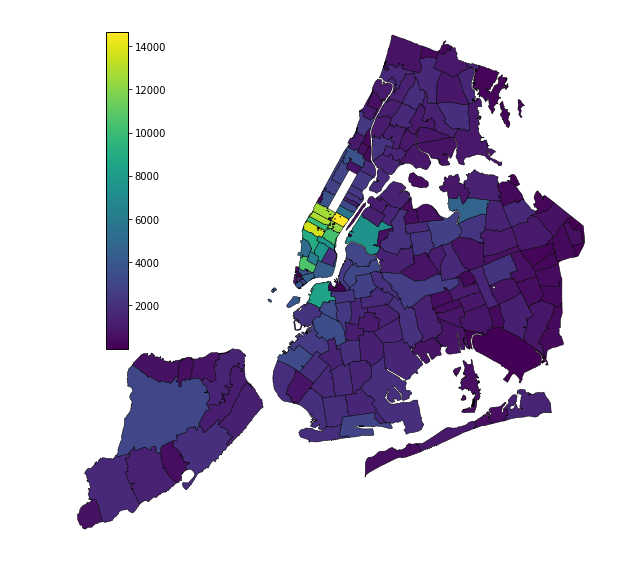

In [84]:
cp.choroplethNYC(nonres_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# New Buildings and Major renoventions

In [85]:
new_buildings_byct = new_buildings.groupby(new_buildings["Zip Code"]).count()
major_renovation_byct = major_renovation.groupby(major_renovation["Zip Code"]).count()

In [86]:
new_buildings_byct["Zip"] = new_buildings_byct.index.astype(int)
new_buildings_byct["Zips"] = new_buildings_byct["Zip"].astype(str)
nb = pd.merge(new_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nb_ = gp.GeoDataFrame(nb)

major_renovation_byct["Zip"] = major_renovation_byct.index.astype(int)
major_renovation_byct["Zips"] = major_renovation_byct["Zip"].astype(str)
mr = pd.merge(major_renovation_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
mr_ = gp.GeoDataFrame(mr)

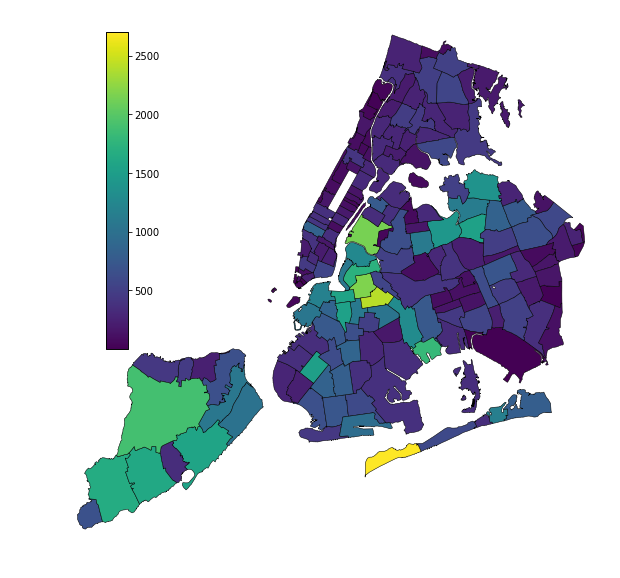

In [87]:
cp.choroplethNYC(nb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

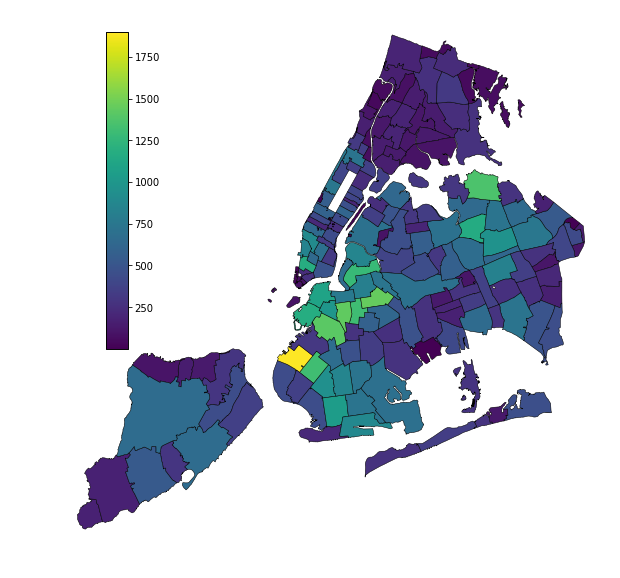

In [88]:
cp.choroplethNYC(mr_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [89]:
nb_["new_buildings_density"] = nb_["BOROUGH"] / nb_["AREA"]
mr_["major_renovation_density"] = mr_["BOROUGH"] / mr_["AREA"]

(array([ 192.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  3.00129559e-08,   1.52168232e-04,   3.04306450e-04,
          4.56444669e-04,   6.08582887e-04,   7.60721106e-04,
          9.12859324e-04,   1.06499754e-03,   1.21713576e-03,
          1.36927398e-03,   1.52141220e-03]),
 <a list of 10 Patch objects>)

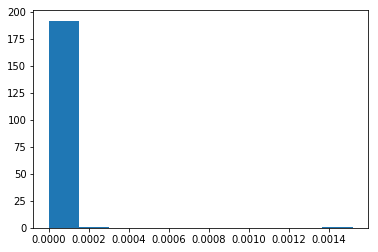

In [90]:
pl.hist(nb_.new_buildings_density)

In [91]:
#cp.choroplethNYC(nb1_, column="new_buildings_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([ 211.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  7.17795035e-08,   1.67875797e-04,   3.35679815e-04,
          5.03483833e-04,   6.71287850e-04,   8.39091868e-04,
          1.00689589e-03,   1.17469990e-03,   1.34250392e-03,
          1.51030794e-03,   1.67811196e-03]),
 <a list of 10 Patch objects>)

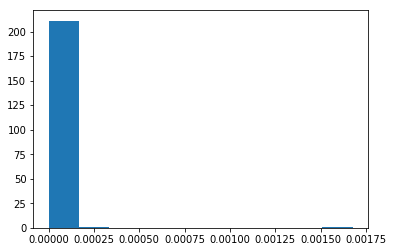

In [92]:
pl.hist(mr_.major_renovation_density)

In [93]:
#cp.choroplethNYC(mr1_, column="major_renovation_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [94]:
big_buildings_byct = big_bldg.groupby(big_bldg["Zip Code"]).count()
small_buildings_byct = small_bldg.groupby(small_bldg["Zip Code"]).count()

In [95]:
big_buildings_byct["Zip"] = big_buildings_byct.index.astype(int)
big_buildings_byct["Zips"] = big_buildings_byct["Zip"].astype(str)
bb = pd.merge(big_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
bb_ = gp.GeoDataFrame(bb)

small_buildings_byct["Zip"] = small_buildings_byct.index.astype(int)
small_buildings_byct["Zips"] = small_buildings_byct["Zip"].astype(str)
sb = pd.merge(small_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
sb_ = gp.GeoDataFrame(sb)

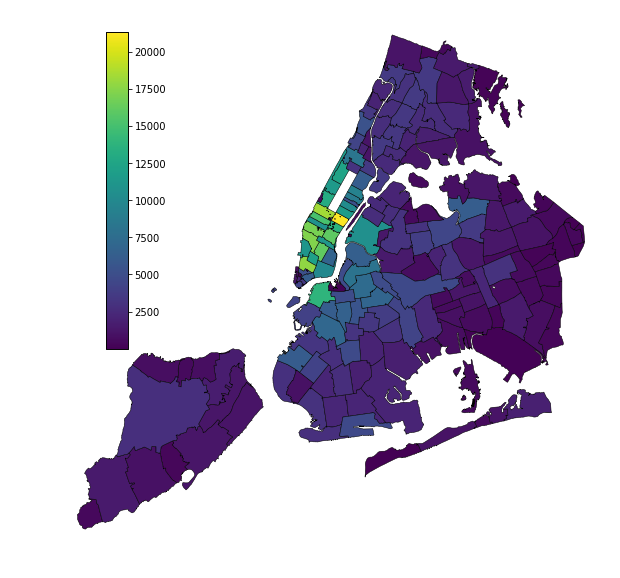

In [96]:
cp.choroplethNYC(bb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

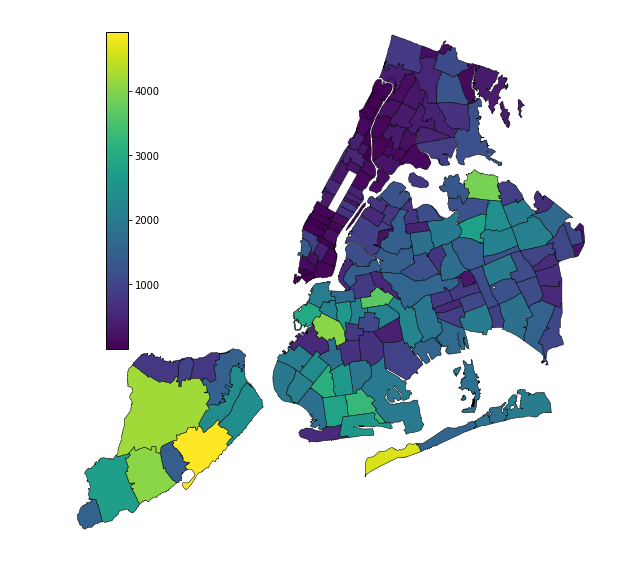

In [97]:
cp.choroplethNYC(sb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Here finishes the exploration of the building permits and the business Licenses

# Develop the index of gentrification based on business licenses and building permits (WE ARE STILL NOT INCORPORATING RENT)

In [98]:
nb_.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0    852.0    852      852          852    852         852       852   
1    559.0    559      559          559    559         559       559   
2    207.0    207      207          207    207         207       207   
3     45.0     45       45           45     45          45        45   
4     45.0     45       45           45     45          45        45   

   Self_Cert  Block  Lot          ...                    AREA  STATE  \
0        818    852  852          ...            1.779494e+07     NY   
1        479    559  559          ...            2.628013e+07     NY   
2        206    207  207          ...            1.553838e+07     NY   
3         45     45   45          ...            4.002521e+06     NY   
4         45     45   45          ...            1.202708e+06     NY   

     COUNTY  ST_FIPS  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0  New York       36       061  http://www.usps.com/         0.0        0.0   
1  New York       36       061  http://www.usps.com/         0.0        0.0   
2  New York       36       061  http://www.usps.com/         0.0        0.0   
3  New York       36       061  http://www.usps.com/         0.0        0.0   
4  New York       36       061  http://www.usps.com/         0.0        0.0   

                                            geometry  new_buildings_density  
0  POLYGON ((981958.6472873986 213464.4530421346,...               0.000048  
1  POLYGON ((991339.8703228086 207576.7837151289,...               0.000021  
2  POLYGON ((989830.469142139 207048.1263078749, ...               0.000013  
3  POLYGON ((981197.408652395 196571.0816452205, ...               0.000011  
4  POLYGON ((972696.8446168154 193014.5477478057,...               0.000037  

[5 rows x 75 columns]

In [99]:
nb_["count_new_buildings"] = nb_["BOROUGH"]
mr_["count_major_renovation"] = mr_["BOROUGH"]

In [100]:
mr_.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0    644.0    644      644          644    644         644       644   
1    485.0    485      485          485    485         485       485   
2    694.0    694      694          694    694         694       694   
3     95.0     95       95           95     95          95        95   
4     95.0     95       95           95     95          95        95   

   Self_Cert  Block  Lot           ...            STATE    COUNTY  ST_FIPS  \
0        550    644  644           ...               NY  New York       36   
1        433    485  485           ...               NY  New York       36   
2        660    694  694           ...               NY  New York       36   
3         85     95   95           ...               NY  New York       36   
4         85     95   95           ...               NY  New York       36   

   CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0       061  http://www.usps.com/         0.0        0.0   
1       061  http://www.usps.com/         0.0        0.0   
2       061  http://www.usps.com/         0.0        0.0   
3       061  http://www.usps.com/         0.0        0.0   
4       061  http://www.usps.com/         0.0        0.0   

                                            geometry  \
0  POLYGON ((981958.6472873986 213464.4530421346,...   
1  POLYGON ((991339.8703228086 207576.7837151289,...   
2  POLYGON ((989830.469142139 207048.1263078749, ...   
3  POLYGON ((981197.408652395 196571.0816452205, ...   
4  POLYGON ((972696.8446168154 193014.5477478057,...   

   major_renovation_density  count_major_renovation  
0                  0.000036                   644.0  
1                  0.000018                   485.0  
2                  0.000045                   694.0  
3                  0.000024                    95.0  
4                  0.000079                    95.0  

[5 rows x 76 columns]

In [101]:
mr_.shape

(213, 76)

In [102]:
mr_.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Bldg Type',
       'Residential', 'Special District 1', 'Special District 2', 'Work Type',
       'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence #',
       'Permit Subtype', 'Oil Gas', 'Site Fill', 'Filing Date',
       'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
       'Owner

In [103]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

# We filter by the variables that we are interested in in each dataset

In [104]:
Major_Renovation_ = mr_[["ZIPCODE", "POPULATION","AREA","COUNTY","count_major_renovation", "geometry"]]
New_Building_ = nb_[["ZIPCODE", "count_new_buildings"]]
Businesses_ = df_[["ZIPCODE_y", "n/o"]] 

In [105]:
print(Major_Renovation_.shape)
print(New_Building_.shape)
print(Businesses_.shape)

(213, 6)
(194, 2)
(261, 2)


In [106]:
countzip.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
Zip Code                                                                      
0.0            32     32       32           32     32          32        32   
4452.0          8      8        8            8      8           8         8   
10000.0        27     27       27           27     27          27        27   
10001.0     17003  17003    17003        17003  17003       17003     17003   
10002.0     10066  10066    10066        10066  10066       10066     10066   

          Self_Cert  Block    Lot  ...    Owner's Phone #  DOBRunDate  \
Zip Code                           ...                                  
0.0              32     32     32  ...                 32          32   
4452.0            8      8      8  ...                  8           8   
10000.0          26     27     27  ...                 27          27   
10001.0       16804  17003  17003  ...              17003       17003   
10002.0        9881  10066  10066  ...              10066       10066   

          PERMIT_SI_NO  LATITUDE  LONGITUDE  COUNCIL_DISTRICT  CENSUS_TRACT  \
Zip Code                                                                      
0.0                 32        32         32                32            32   
4452.0               8         0          0                 0             0   
10000.0             27        27         27                27            27   
10001.0          17003     16996      16996             16996         16996   
10002.0          10066     10061      10061             10061         10061   

          NTA_NAME    Zip   Zips  
Zip Code                          
0.0             32      0      0  
4452.0           0   4452   4452  
10000.0         27  10000  10000  
10001.0      16996  10001  10001  
10002.0      10061  10002  10002  

[5 rows x 61 columns]

In [107]:
type(countzip.Zip.iloc[1])

numpy.int64

In [108]:
countzip["Zip"] = countzip["Zip"].astype(str)

# We merge the datasets

In [109]:
ultimate_df = pd.merge(Major_Renovation_, New_Building_, on = "ZIPCODE")
ultimate_df = pd.merge(Businesses_, ultimate_df, right_on = "ZIPCODE", left_on = "ZIPCODE_y")
ultimate_df = pd.merge(countzip, ultimate_df, right_on = "ZIPCODE", left_on = "Zip")

### The shape is wierd, we need to eliminate the duplicates

In [110]:
ultimate_df.shape

(830, 70)

In [111]:
len(ultimate_df.ZIPCODE_y.unique())

180

In [112]:
ultimate_df.head(10)

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0    17003  17003    17003        17003  17003       17003     17003   
1    10066  10066    10066        10066  10066       10066     10066   
2    16577  16577    16577        16577  16577       16577     16577   
3     4331   4331     4331         4331   4331        4331      4331   
4     4331   4331     4331         4331   4331        4331      4331   
5     4331   4331     4331         4331   4331        4331      4331   
6     4331   4331     4331         4331   4331        4331      4331   
7     4331   4331     4331         4331   4331        4331      4331   
8     4331   4331     4331         4331   4331        4331      4331   
9     4331   4331     4331         4331   4331        4331      4331   

   Self_Cert  Block    Lot         ...            Zips  ZIPCODE_y       n/o  \
0      16804  17003  17003         ...           10001      10001  0.533825   
1       9881  10066  10066         ...           10002      10002  0.473819   
2      16463  16577  16577         ...           10003      10003  0.420635   
3       4299   4331   4331         ...           10004      10004  0.496063   
4       4299   4331   4331         ...           10004      10004  0.496063   
5       4299   4331   4331         ...           10004      10004  0.496063   
6       4299   4331   4331         ...           10004      10004  0.496063   
7       4299   4331   4331         ...           10004      10004  0.496063   
8       4299   4331   4331         ...           10004      10004  0.496063   
9       4299   4331   4331         ...           10004      10004  0.496063   

   ZIPCODE  POPULATION          AREA    COUNTY  count_major_renovation  \
0    10001     22413.0  1.779494e+07  New York                   644.0   
1    10002     81305.0  2.628013e+07  New York                   485.0   
2    10003     55878.0  1.553838e+07  New York                   694.0   
3    10004      2187.0  4.002521e+06  New York                    95.0   
4    10004      2187.0  4.002521e+06  New York                    95.0   
5    10004      2187.0  4.002521e+06  New York                    95.0   
6    10004      2187.0  4.002521e+06  New York                    95.0   
7    10004      2187.0  1.202708e+06  New York                    95.0   
8    10004      2187.0  1.202708e+06  New York                    95.0   
9    10004      2187.0  1.202708e+06  New York                    95.0   

                                            geometry  count_new_buildings  
0  POLYGON ((981958.6472873986 213464.4530421346,...                852.0  
1  POLYGON ((991339.8703228086 207576.7837151289,...                559.0  
2  POLYGON ((989830.469142139 207048.1263078749, ...                207.0  
3  POLYGON ((981197.408652395 196571.0816452205, ...                 45.0  
4  POLYGON ((981197.408652395 196571.0816452205, ...                 45.0  
5  POLYGON ((981197.408652395 196571.0816452205, ...                 45.0  
6  POLYGON ((981197.408652395 196571.0816452205, ...                 45.0  
7  POLYGON ((972696.8446168154 193014.5477478057,...                 45.0  
8  POLYGON ((972696.8446168154 193014.5477478057,...                 45.0  
9  POLYGON ((972696.8446168154 193014.5477478057,...                 45.0  

[10 rows x 70 columns]

In [113]:
ultimate_df = ultimate_df.drop_duplicates("ZIPCODE")

# INDEX

### Renovation = K * (N/0) * ((NBP + MRP) / (TP * (Area ** 0.5))

In [114]:
ultimate_df.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0      17003  17003    17003        17003  17003       17003     17003   
1      10066  10066    10066        10066  10066       10066     10066   
2      16577  16577    16577        16577  16577       16577     16577   
3       4331   4331     4331         4331   4331        4331      4331   
259     3449   3449     3449         3449   3449        3449      3449   

     Self_Cert  Block    Lot         ...            Zips  ZIPCODE_y       n/o  \
0        16804  17003  17003         ...           10001      10001  0.533825   
1         9881  10066  10066         ...           10002      10002  0.473819   
2        16463  16577  16577         ...           10003      10003  0.420635   
3         4299   4331   4331         ...           10004      10004  0.496063   
259       3409   3449   3449         ...           10005      10005  0.388889   

     ZIPCODE  POPULATION          AREA    COUNTY  count_major_renovation  \
0      10001     22413.0  1.779494e+07  New York                   644.0   
1      10002     81305.0  2.628013e+07  New York                   485.0   
2      10003     55878.0  1.553838e+07  New York                   694.0   
3      10004      2187.0  4.002521e+06  New York                    95.0   
259    10005      8107.0  2.082901e+06  New York                    96.0   

                                              geometry  count_new_buildings  
0    POLYGON ((981958.6472873986 213464.4530421346,...                852.0  
1    POLYGON ((991339.8703228086 207576.7837151289,...                559.0  
2    POLYGON ((989830.469142139 207048.1263078749, ...                207.0  
3    POLYGON ((981197.408652395 196571.0816452205, ...                 45.0  
259  POLYGON ((982595.6794779003 195880.7536295503,...                  3.0  

[5 rows x 70 columns]

# We define the index here (Please refer to the paper to see the underlining concepts of this definition)

In [115]:
ultimate_df["renovation_index"] = 1000000 * ultimate_df["n/o"] * (ultimate_df["count_new_buildings"]  + ultimate_df["count_major_renovation"]) / (ultimate_df["AREA"]**0.5 * ultimate_df.BOROUGH)
                                   
                                   
                                   
                                   

In [116]:
ultimate_df.shape

(180, 71)

In [117]:
ultimate_df_ = gp.GeoDataFrame(ultimate_df)

# We plot our index by Zip Code in NYC

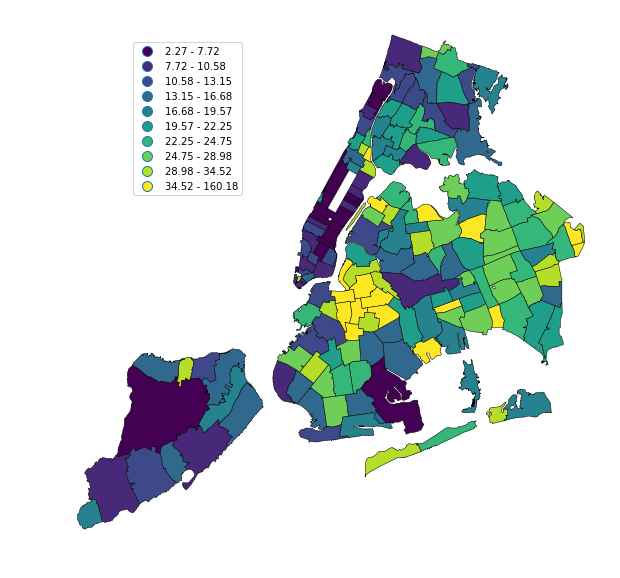

In [118]:
cp.choroplethNYC(ultimate_df_, column="renovation_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");





# It shows some interesting stuff, particularly a zone in north-west Brooklyn with high gentrification (Makes sense, that is williamsburg, bushwick, bedstuy, and fort greene) neighborhoods known for being gentrified 

# Now we want to include rent price, therefor we read the Zillow data, simoultaneously we compare our results with the Furman Center gentrification map at the Zip Code level

In [119]:
rent_price = pd.read_csv("Zip_rent.csv")

In [120]:
rent_price.head()

RegionID  RegionName         City State              Metro CountyName  \
0     61639       10025     New York    NY           New York   New York   
1     84654       60657      Chicago    IL            Chicago       Cook   
2     61637       10023     New York    NY           New York   New York   
3     90668       75070     McKinney    TX  Dallas-Fort Worth     Collin   
4     91982       77494  Cinco Ranch    TX            Houston  Fort Bend   

   SizeRank  2010-11  2010-12  2011-01   ...     2017-05  2017-06  2017-07  \
0         1      NaN      NaN      NaN   ...        3538     3527     3537   
1         2   1731.0   1742.0   1750.0   ...        1879     1889     1896   
2         3      NaN      NaN      NaN   ...        3791     3799     3848   
3         4   1577.0   1576.0   1582.0   ...        1927     1928     1930   
4         5   2184.0   2185.0   2181.0   ...        2157     2153     2154   

   2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  
0     3551     3572     3579     3576     3555     3528     3509  
1     1902     1905     1906     1897     1886     1877     1872  
2     3899     3944     3946     3919     3869     3831     3782  
3     1930     1930     1930     1929     1923     1915     1908  
4     2154     2154     2153     2159     2170     2182     2191  

[5 rows x 95 columns]

In [121]:
rent_price.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01',

In [122]:
print (type(rent_price.RegionName.iloc[2]))
print (type(ultimate_df_.ZIPCODE.iloc[2]))

<class 'numpy.int64'>
<class 'str'>


In [123]:
rent_price["ZIPCODE"] = rent_price.RegionName.astype(str)

# We just want the rent prices for zipcodes in NY, so we merge

In [124]:
final_index_data = pd.merge(rent_price, ultimate_df_, how = "right",on = "ZIPCODE")

In [125]:
ultimate_df_.shape

(180, 71)

In [126]:
final_index_data.shape

(180, 166)

In [129]:
#final_index_data["increase_3_year"]=final_index_data.increase_3_year.fillna(value = final_index_data.increase_3_year.mean())



In [130]:
final_index_data_ = gp.GeoDataFrame(final_index_data)

# We load the data of the gentrification map done by the Furman Center We have it in Github

In [239]:
# For a very wierd reason this url does not load everytime, in case you it gives you an error, 
# please go to the github repo and get a new link, the path is the same in the current URL.


furman = pd.read_csv("https://raw.githubusercontent.com/CUSPcapstones/Digital-Traces-of-Gentrification_2018/master/notebooks/ReproduceMapGentrification/gentrification.csv?token=AcyV_KNU7h4nN0ZbKCAE1Muq60xh_6Rrks5bYH6_wA%3D%3D")




In [240]:
furman.describe()

Unnamed: 0       zipcode  gentrification
count  237.000000    237.000000      237.000000
mean   118.000000  10624.603376        1.717300
std     68.560193    986.583432        0.560187
min      0.000000     83.000000        0.000000
25%     59.000000  10120.000000        2.000000
50%    118.000000  10468.000000        2.000000
75%    177.000000  11241.000000        2.000000
max    236.000000  11697.000000        2.000000

In [241]:
furman_useful = furman[furman["gentrification"]!=2]

In [242]:
furman_useful.describe()

Unnamed: 0       zipcode  gentrification
count   54.000000     54.000000       54.000000
mean   108.462963  10672.351852        0.759259
std     54.567498    511.874253        0.431548
min      6.000000  10002.000000        0.000000
25%     41.250000  10039.250000        1.000000
50%    120.000000  10470.000000        1.000000
75%    151.750000  11213.750000        1.000000
max    197.000000  11370.000000        1.000000

In [243]:
furman_useful.head()

Unnamed: 0  zipcode  gentrification
6            6    10002               1
7            7    10003               1
12          12    10009               1
28          28    10026               1
29          29    10027               1

In [244]:
final_index_data.ZIPCODE.head()

0    10025
1    10023
2    10002
3    10467
4    11226
Name: ZIPCODE, dtype: object

In [245]:
print (type(furman_useful.zipcode.iloc[1]))
print (type(final_index_data_.ZIPCODE.iloc[1]))

<class 'numpy.int64'>
<class 'str'>


In [246]:
furman_useful["ZIPCODE"] = furman_useful.zipcode.astype(str)
furman["ZIPCODE"] = furman.zipcode.astype(str)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Merge furman with final_index_data_ 

In [247]:
validation2 = pd.merge(final_index_data_, furman, on = "ZIPCODE")

In [248]:
validation2 = gp.GeoDataFrame(validation2)

In [249]:
validation2.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '2010-11', '2010-12', '2011-01',
       ...
       'renovation_index', 'increase_3_year', 'increase_2_year',
       'renovation_index_with_rent', 'average_rent_2017', 'average_rent_2014',
       '3_year_absolute_rent_increase', 'Unnamed: 0', 'zipcode',
       'gentrification'],
      dtype='object', length=175)

# Plot Furman Center Map at the Zip Code Level and renovation index (still no rent included)

Text(0.5,1,'Furman')

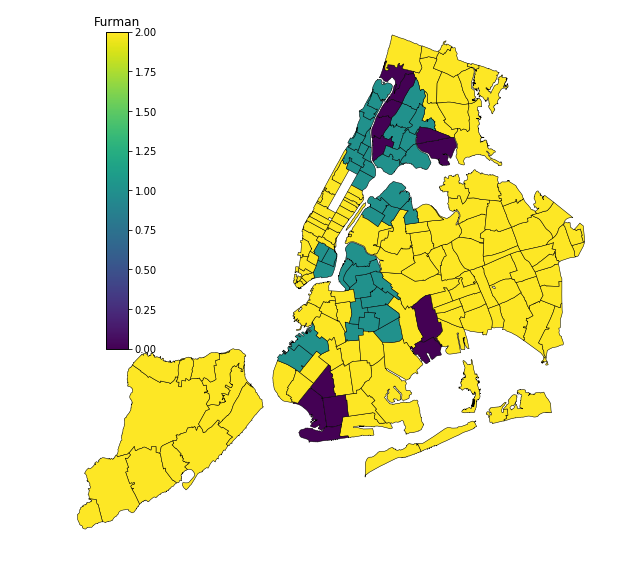

In [250]:
cp.choroplethNYC(validation2, column="gentrification", color="k",cmap="viridis", edgecolor="k", lw=0.5);
pl.title("Furman")

Text(0.5,1,'Index')

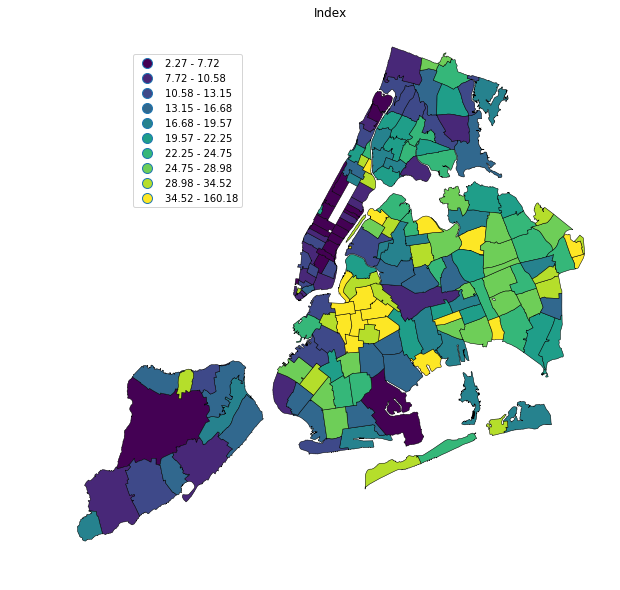

In [251]:
cp.choroplethNYC(validation2, column="renovation_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Index")

In [252]:
final_index_data.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0   61639.0     10025.0  New York    NY  New York   New York       1.0   
1   61637.0     10023.0  New York    NY  New York   New York       3.0   
2   61616.0     10002.0  New York    NY  New York   New York       9.0   
3   61807.0     10467.0  New York    NY  New York      Bronx      10.0   
4   62037.0     11226.0  New York    NY  New York      Kings      14.0   

   2010-11  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  2012-01  2012-02  \
0      NaN      NaN      NaN      NaN      NaN   2963.0   2970.0   2997.0   
1      NaN      NaN      NaN      NaN      NaN   3212.0   3183.0   3208.0   
2      NaN      NaN      NaN      NaN      NaN   3091.0   3088.0   3113.0   
3      NaN      NaN      NaN      NaN      NaN   1492.0   1481.0   1488.0   
4      NaN      NaN      NaN      NaN      NaN   1578.0   1581.0   1594.0   

   2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  2012-09  2012-10  \
0   3012.0   3010.0   2997.0   2979.0   2975.0   3013.0   3064.0   3085.0   
1   3240.0   3267.0   3291.0   3286.0   3288.0   3302.0   3334.0   3354.0   
2   3111.0   3129.0   3161.0   3190.0   3208.0   3221.0   3230.0   3250.0   
3   1496.0   1499.0   1498.0   1500.0   1512.0   1530.0   1541.0   1543.0   
4   1604.0   1612.0   1611.0   1625.0   1626.0   1635.0   1642.0   1658.0   

   2012-11  2012-12  2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  \
0   3082.0   3111.0   3151.0   3165.0   3168.0   3182.0   3225.0   3272.0   
1   3347.0   3343.0   3334.0   3313.0   3336.0   3375.0   3445.0   3465.0   
2   3266.0   3270.0   3265.0   3245.0   3241.0   3249.0   3284.0   3309.0   
3   1556.0   1551.0   1536.0   1525.0   1522.0   1537.0   1558.0   1583.0   
4   1676.0   1694.0   1716.0   1734.0   1757.0   1774.0   1809.0   1831.0   

   2013-07  2013-08  2013-09  2013-10  2013-11  2013-12  2014-01  2014-02  \
0   3297.0   3257.0   3211.0   3215.0   3238.0   3296.0   3338.0   3381.0   
1   3477.0   3438.0   3428.0   3441.0   3484.0   3555.0   3601.0   3614.0   
2   3296.0   3256.0   3228.0   3263.0   3323.0   3380.0   3407.0   3427.0   
3   1591.0   1585.0   1573.0   1575.0   1590.0   1595.0   1597.0   1594.0   
4   1852.0   1850.0   1853.0   1855.0   1885.0   1923.0   1959.0   1972.0   

   2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  \
0   3398.0   3381.0   3376.0   3361.0   3384.0   3409.0   3450.0   3491.0   
1   3581.0   3550.0   3557.0   3562.0   3599.0   3647.0   3713.0   3813.0   
2   3434.0   3446.0   3451.0   3459.0   3506.0   3571.0   3639.0   3719.0   
3   1587.0   1583.0   1579.0   1576.0   1578.0   1598.0   1629.0   1659.0   
4   1983.0   1991.0   1990.0   1992.0   2004.0   2023.0   2032.0   2024.0   

   2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  \
0   3537.0   3543.0   3541.0   3551.0   3585.0   3655.0   3694.0   3730.0   
1   3904.0   3974.0   4012.0   4059.0   4059.0   4069.0   4039.0   4084.0   
2   3784.0   3836.0   3865.0   3900.0   3913.0   3924.0   3911.0   3908.0   
3   1688.0   1699.0   1707.0   1715.0   1728.0   1736.0   1744.0   1747.0   
4   2009.0   2001.0   1990.0   1991.0   2015.0   2029.0   2034.0   2028.0   

   2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  \
0   3715.0   3718.0   3706.0   3675.0   3641.0   3618.0   3623.0   3620.0   
1   4083.0   4099.0   4053.0   3974.0   3925.0   3897.0   3915.0   3969.0   
2   3889.0   3886.0   3864.0   3781.0   3731.0   3707.0   3755.0   3781.0   
3   1744.

# Develop Final Gentrification Index including Rent, calculating the average price of rent in 2013 and 2017, empty values are filled with the average

### Renovation = K * (N/0) * (AVRP2017/AVRP2013) * ((NBP + MRP) / (TP * (Area ** 0.5)))

In [253]:
final_index_data_["average_rent_2017"] = (final_index_data_["2017-01"] + final_index_data_["2017-02"] +final_index_data_["2017-03"] +final_index_data_["2017-04"] +final_index_data_["2017-05"] +final_index_data_["2017-06"] +final_index_data_["2017-07"] +final_index_data_["2017-08"] +final_index_data_["2017-09"] +final_index_data_["2017-10"] +final_index_data_["2017-11"] +final_index_data_["2017-12"])/12
final_index_data_["average_rent_2013"] = (final_index_data_["2013-01"] + final_index_data_["2013-02"] +final_index_data_["2013-03"] +final_index_data_["2013-04"] +final_index_data_["2013-05"] +final_index_data_["2013-06"] +final_index_data_["2013-07"] +final_index_data_["2013-08"] +final_index_data_["2013-09"] +final_index_data_["2013-10"] +final_index_data_["2013-11"] +final_index_data_["2013-12"])/12

final_index_data_["average_rent_2017"]=final_index_data_.average_rent_2017.fillna(value = final_index_data_.average_rent_2017.mean())
final_index_data_["average_rent_2013"]=final_index_data_.average_rent_2013.fillna(value = final_index_data_.average_rent_2013.mean())

final_index_data_["increase_3_year"] = final_index_data_["average_rent_2017"] / final_index_data_["average_rent_2013"]
final_index_data_["renovation_index_with_rent"] = 1000000 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] + final_index_data_["count_major_renovation"]) / (final_index_data_["AREA"] * final_index_data.BOROUGH) * final_index_data_["AREA"]**0.5
final_index_data_["3_year_absolute_rent_increase"] = final_index_data_["average_rent_2017"]-final_index_data_["average_rent_2013"]





In [254]:
print(final_index_data_.average_rent_2013.mean())
print(final_index_data_.average_rent_2017.mean())

2168.49068323
2571.45910973


# Plot the renovation index with rent and the rent increase (percentual and quantitative)

Text(0.5,1,'Percentual Increase')

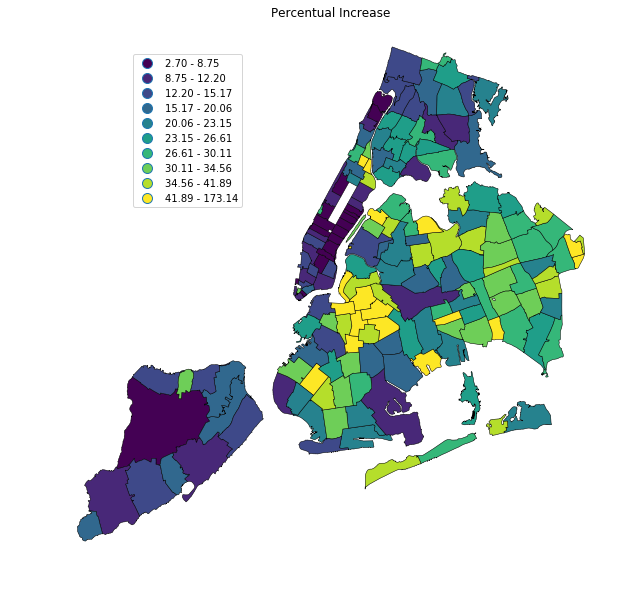

In [255]:

cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Percentual Increase")



Text(0.5,1,'Percentual Increase')

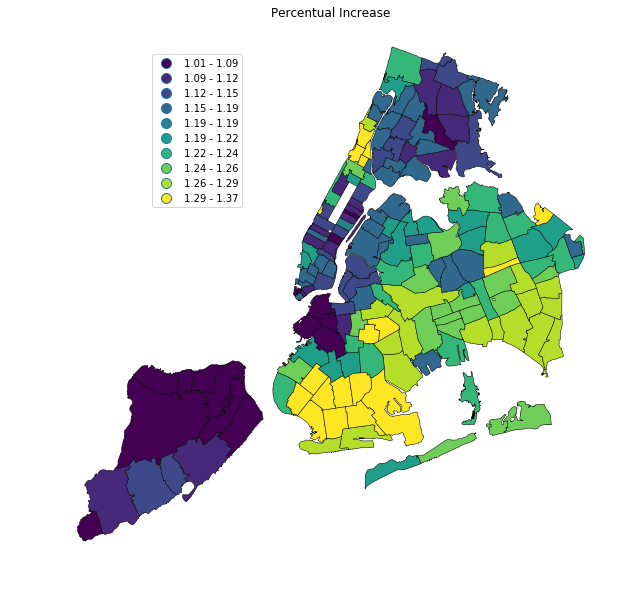

In [256]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Percentual Increase")

Text(0.5,1,'Absolute Increase')

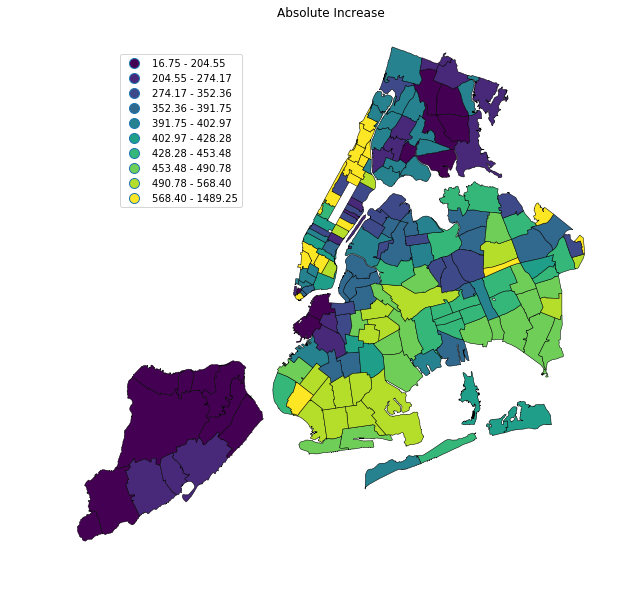

In [257]:
cp.choroplethNYC(final_index_data_, column="3_year_absolute_rent_increase", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Absolute Increase")

Text(0.5,1,'Gentrification index by Zip Code in NYC')

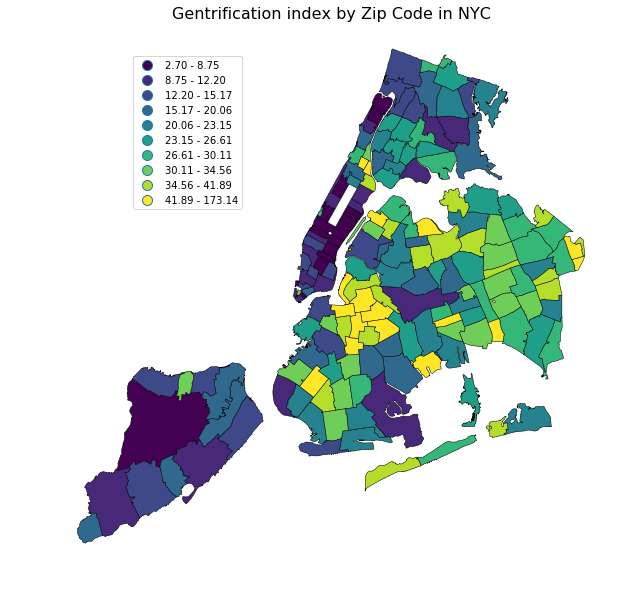

In [258]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Gentrification index by Zip Code in NYC", fontsize = 16)

# Now we do some mean comparisson between the gentrification index depending on the category each zip code would belong to according to the Furman Center, to check for the consistency of our index against previous work

In [259]:
ensayo = validation[validation["renovation_index_with_rent"]<80]
ensayo1 = ensayo.groupby("gentrification").mean()

In [260]:
validation = pd.merge(furman, final_index_data_, on = "ZIPCODE")
validation = gp.GeoDataFrame(validation)
test = validation.groupby("gentrification").mean()

(0, 60)

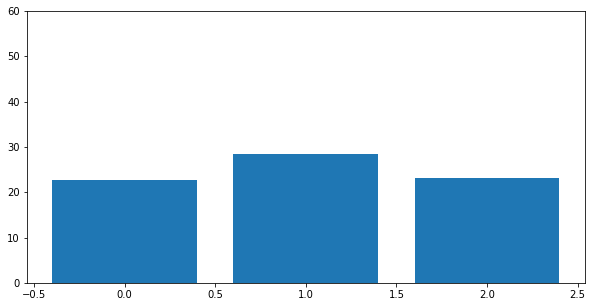

In [261]:
pl.bar(ensayo1.index, ensayo1.renovation_index_with_rent)
pl.ylim(0,60)

In [262]:
ensayo1.renovation_index_with_rent

gentrification
0    22.737189
1    28.529197
2    23.108108
Name: renovation_index_with_rent, dtype: float64

In [263]:
ensayo1.renovation_index_with_rent.std()

3.2422504728442338

(0, 60)

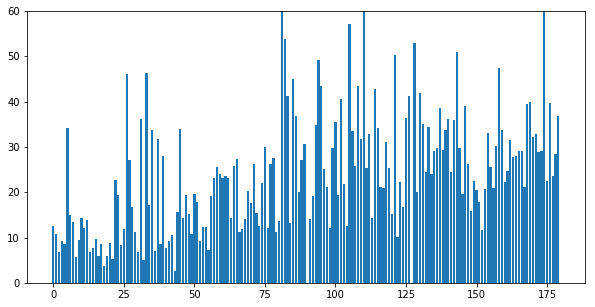

In [264]:
pl.bar(ensayo.index, ensayo.renovation_index_with_rent)
pl.ylim(0,60)

Text(0.5,1,'Average gentrification index')

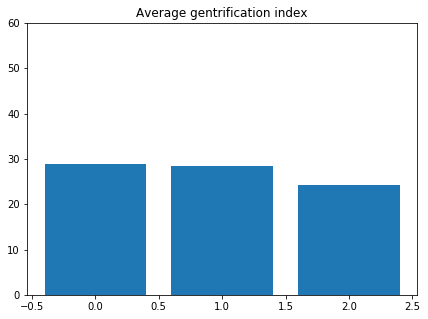

In [265]:
figure=figsize(7,5)
pl.bar(test.index, test.renovation_index_with_rent)
pl.ylim(0,60)
pl.title("Average gentrification index")

(0, 60)

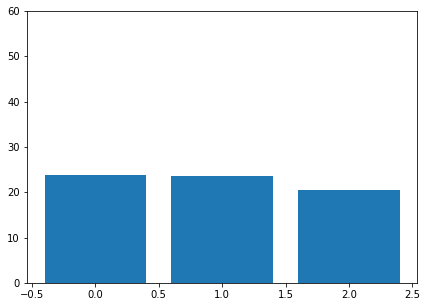

In [266]:
pl.bar(test.index, test.renovation_index)
pl.ylim(0,60)

In [267]:
validation.gentrification.value_counts()

2    126
1     41
0     13
Name: gentrification, dtype: int64

In [268]:
Major_Renovation_.shape

(213, 6)

In [269]:
validation1  = validation[validation["gentrification"]!=2]

In [270]:
validation.head()

Unnamed: 0  zipcode  gentrification ZIPCODE  RegionID  RegionName  \
0           5    10001               2   10001   61615.0     10001.0   
1           6    10002               1   10002   61616.0     10002.0   
2           7    10003               1   10003   61617.0     10003.0   
3           8    10004               2   10004   61618.0     10004.0   
4           9    10005               2   10005   61619.0     10005.0   

       City State     Metro CountyName  SizeRank  2010-11  2010-12  2011-01  \
0  New York    NY  New York   New York    1786.0      NaN      NaN      NaN   
1  New York    NY  New York   New York       9.0      NaN      NaN      NaN   
2  New York    NY  New York   New York      45.0      NaN      NaN      NaN   
3  New York    NY  New York   New York   11103.0      NaN      NaN      NaN   
4  New York    NY  New York   New York    7161.0      NaN      NaN      NaN   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0      NaN      NaN   3291.0   3264.0   3283.0   3310.0   3343.0   3359.0   
1      NaN      NaN   3091.0   3088.0   3113.0   3111.0   3129.0   3161.0   
2      NaN      NaN   3337.0   3286.0   3286.0   3313.0   3336.0   3362.0   
3      NaN      NaN   3509.0   3515.0   3558.0   3572.0   3596.0   3628.0   
4      NaN      NaN   3336.0   3331.0   3358.0   3370.0   3405.0   3428.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   3344.0   3336.0   3350.0   3375.0   3412.0   3411.0   3420.0   3408.0   
1   3190.0   3208.0   3221.0   3230.0   3250.0   3266.0   3270.0   3265.0   
2   3362.0   3368.0   3385.0   3405.0   3424.0   3421.0   3418.0   3406.0   
3   3637.0   3649.0   3646.0   3669.0   3690.0   3673.0   3675.0   3612.0   
4   3435.0   3439.0   3441.0   3452.0   3486.0   3516.0   3545.0   3514.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3387.0   3369.0   3380.0   3432.0   3467.0   3481.0   3452.0   3470.0   
1   3245.0   3241.0   3249.0   3284.0   3309.0   3296.0   3256.0   3228.0   
2   3381.0   3366.0   3388.0   3462.0   3524.0   3525.0   3478.0   3480.0   
3   3574.0   3560.0   3600.0   3666.0   3692.0   3703.0   3668.0   3660.0   
4   3490.0   3476.0   3488.0   3516.0   3526.0   3532.0   3505.0   3497.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3523.0   3578.0   3629.0   3647.0   3657.0   3624.0   3614.0   3613.0   
1   3263.0   3323.0   3380.0   3407.0   3427.0   3434.0   3446.0   3451.0   
2   3539.0   3611.0   3667.0   3694.0   3702.0   3660.0   3647.0   3654.0   
3   3667.0   3684.0   3702.0   3748.0   3797.0   3824.0   3816.0   3783.0   
4   3507.0   3527.0   3528.0   3534.0   3567.0   3605.0   3627.0   3604.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3619.0   3649.0   3705.0   3744.0   3815.0   3880.0   3945.0   3998.0   
1   3459.0   3506.0   3571.0   3639.0   3719.0   3784.0   3836.0   3865.0   
2   3668.0   3716.0   3788.0   3866.0   3990.0   4110.0   4226.0   4282.0   
3   3787.0   3830.0   3918.0   3958.0   3995.0   4055.0   4101.0   4138.0   
4   3611.0   3632.0   3702.0   3733.0   3798.0   3831.0   3860.0   3876.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   4062.0   4109.0   4125.0   4097.0   4085.0   4058.0   4055.0   4042.0   
1   3900.0   3913.0   3924.0   3911.0   3908.0   3889.0   3886.0   3864.0   
2   4349.0   4392.0   4408.0   4364.0   4343.0   4334.0   4353.0   4329.0   
3   4145.

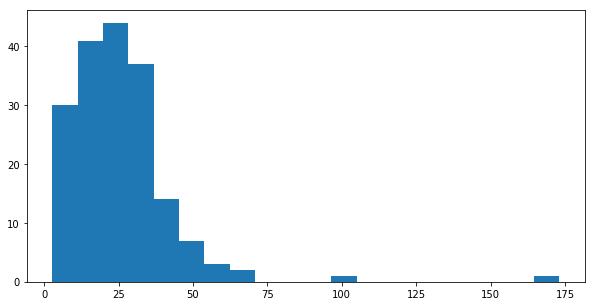

In [271]:
figure = figsize(10,5)
pl.hist(validation.renovation_index_with_rent, bins = 20);

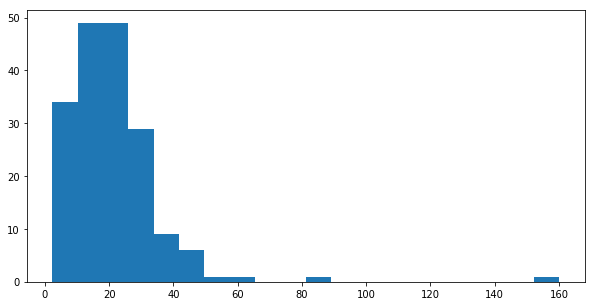

In [272]:
pl.hist(validation.renovation_index, bins=20);

In [273]:
print ("with rent mean",validation.renovation_index_with_rent.mean())
print ("without rent mean", validation.renovation_index.mean())
print ("with rent std",validation.renovation_index_with_rent.std())
print ("without rent std",validation.renovation_index.std())

with rent mean 25.5901463875
without rent mean 21.345635328
with rent std 18.0590839635
without rent std 15.6073114467


In [274]:
ensayo.renovation_index_with_rent.mean()

24.331780256546949

In [275]:
ensayo.renovation_index_with_rent.std()

13.12289306588721

In [276]:
len(ensayo.renovation_index_with_rent)

178

In [298]:
np.random.seed(123)

k = 24.331780256546949
std = 13.12289306588721
samp = np.random.normal(k, std, 180)

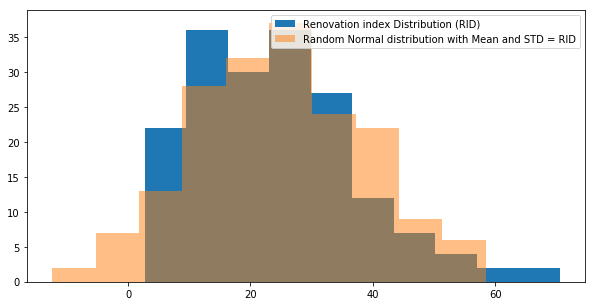

In [299]:
figure = figsize(10,5)
pl.hist(ensayo.renovation_index_with_rent, bins = 10, label="Renovation index Distribution (RID)");
pl.hist(samp, bins = 10, alpha = 0.5, label = "Random Normal distribution with Mean and STD = RID");
pl.legend()

In [300]:
validation.head()

Unnamed: 0  zipcode  gentrification ZIPCODE  RegionID  RegionName  \
0           5    10001               2   10001   61615.0     10001.0   
1           6    10002               1   10002   61616.0     10002.0   
2           7    10003               1   10003   61617.0     10003.0   
3           8    10004               2   10004   61618.0     10004.0   
4           9    10005               2   10005   61619.0     10005.0   

       City State     Metro CountyName  SizeRank  2010-11  2010-12  2011-01  \
0  New York    NY  New York   New York    1786.0      NaN      NaN      NaN   
1  New York    NY  New York   New York       9.0      NaN      NaN      NaN   
2  New York    NY  New York   New York      45.0      NaN      NaN      NaN   
3  New York    NY  New York   New York   11103.0      NaN      NaN      NaN   
4  New York    NY  New York   New York    7161.0      NaN      NaN      NaN   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0      NaN      NaN   3291.0   3264.0   3283.0   3310.0   3343.0   3359.0   
1      NaN      NaN   3091.0   3088.0   3113.0   3111.0   3129.0   3161.0   
2      NaN      NaN   3337.0   3286.0   3286.0   3313.0   3336.0   3362.0   
3      NaN      NaN   3509.0   3515.0   3558.0   3572.0   3596.0   3628.0   
4      NaN      NaN   3336.0   3331.0   3358.0   3370.0   3405.0   3428.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   3344.0   3336.0   3350.0   3375.0   3412.0   3411.0   3420.0   3408.0   
1   3190.0   3208.0   3221.0   3230.0   3250.0   3266.0   3270.0   3265.0   
2   3362.0   3368.0   3385.0   3405.0   3424.0   3421.0   3418.0   3406.0   
3   3637.0   3649.0   3646.0   3669.0   3690.0   3673.0   3675.0   3612.0   
4   3435.0   3439.0   3441.0   3452.0   3486.0   3516.0   3545.0   3514.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3387.0   3369.0   3380.0   3432.0   3467.0   3481.0   3452.0   3470.0   
1   3245.0   3241.0   3249.0   3284.0   3309.0   3296.0   3256.0   3228.0   
2   3381.0   3366.0   3388.0   3462.0   3524.0   3525.0   3478.0   3480.0   
3   3574.0   3560.0   3600.0   3666.0   3692.0   3703.0   3668.0   3660.0   
4   3490.0   3476.0   3488.0   3516.0   3526.0   3532.0   3505.0   3497.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3523.0   3578.0   3629.0   3647.0   3657.0   3624.0   3614.0   3613.0   
1   3263.0   3323.0   3380.0   3407.0   3427.0   3434.0   3446.0   3451.0   
2   3539.0   3611.0   3667.0   3694.0   3702.0   3660.0   3647.0   3654.0   
3   3667.0   3684.0   3702.0   3748.0   3797.0   3824.0   3816.0   3783.0   
4   3507.0   3527.0   3528.0   3534.0   3567.0   3605.0   3627.0   3604.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3619.0   3649.0   3705.0   3744.0   3815.0   3880.0   3945.0   3998.0   
1   3459.0   3506.0   3571.0   3639.0   3719.0   3784.0   3836.0   3865.0   
2   3668.0   3716.0   3788.0   3866.0   3990.0   4110.0   4226.0   4282.0   
3   3787.0   3830.0   3918.0   3958.0   3995.0   4055.0   4101.0   4138.0   
4   3611.0   3632.0   3702.0   3733.0   3798.0   3831.0   3860.0   3876.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   4062.0   4109.0   4125.0   4097.0   4085.0   4058.0   4055.0   4042.0   
1   3900.0   3913.0   3924.0   3911.0   3908.0   3889.0   3886.0   3864.0   
2   4349.0   4392.0   4408.0   4364.0   4343.0   4334.0   4353.0   4329.0   
3   4145.

In [301]:
non_gentrifying = validation[validation["gentrification"]==0]
gentrifying = validation[validation["gentrification"]==1]
high_income = validation[validation["gentrification"]==2]

In [281]:
high_income = high_income[high_income["renovation_index_with_rent"]<70]

In [282]:
print ("this is the mean for non gentrifying",non_gentrifying.renovation_index_with_rent.mean())
print ("this is the mean for gentrifying",gentrifying.renovation_index_with_rent.mean())
print ("this is the mean for high income",high_income.renovation_index_with_rent.mean())
print ()
print ("this is the std for non gentrifying",non_gentrifying.renovation_index_with_rent.std())
print ("this is the std for gentrifying",gentrifying.renovation_index_with_rent.std())
print ("this is the std for high income",high_income.renovation_index_with_rent.std())

this is the mean for non gentrifying 28.8364078359
this is the mean for gentrifying 28.529196619
this is the mean for high income 22.7256723736

this is the std for non gentrifying 23.0232614885
this is the std for gentrifying 14.455479252
this is the std for high income 12.2169396634


(array([ 5.,  5.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  12.55707377,   21.50406961,   30.45106544,   39.39806127,
          48.34505711,   57.29205294,   66.23904878,   75.18604461,
          84.13304045,   93.08003628,  102.02703211]),
 <a list of 10 Patch objects>)

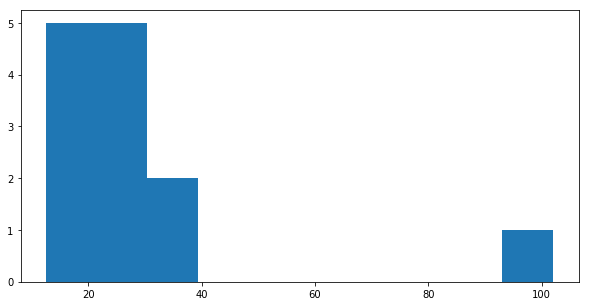

In [283]:
pl.hist(non_gentrifying.renovation_index_with_rent)

(array([ 7.,  4.,  3.,  9.,  4.,  4.,  3.,  3.,  2.,  2.]),
 array([  6.75877502,  12.17045703,  17.58213903,  22.99382104,
         28.40550305,  33.81718506,  39.22886707,  44.64054908,
         50.05223109,  55.4639131 ,  60.87559511]),
 <a list of 10 Patch objects>)

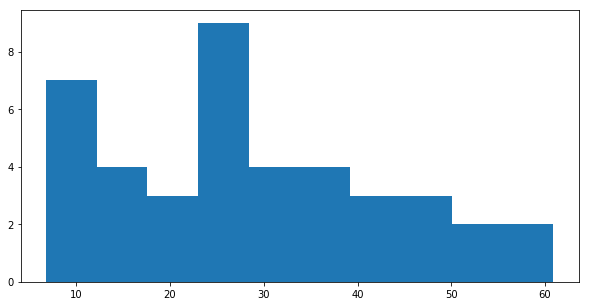

In [284]:
pl.hist(gentrifying.renovation_index_with_rent)

(array([ 16.,  28.,  21.,  18.,  24.,  10.,   3.,   3.,   0.,   1.]),
 array([  2.69668366,   9.20732975,  15.71797583,  22.22862192,
         28.739268  ,  35.24991409,  41.76056017,  48.27120626,
         54.78185234,  61.29249843,  67.80314451]),
 <a list of 10 Patch objects>)

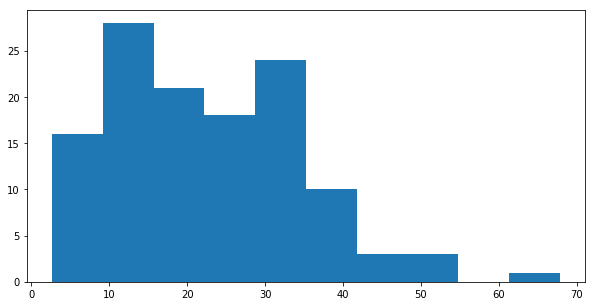

In [285]:
pl.hist(high_income.renovation_index_with_rent, bins = 10)

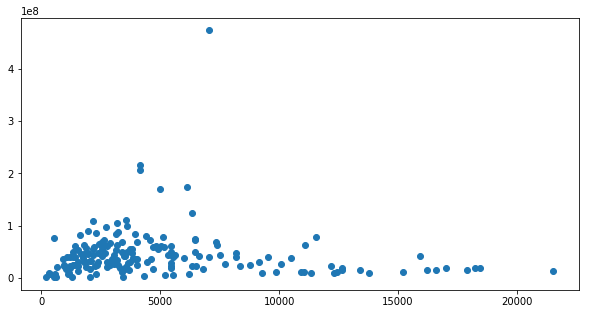

In [286]:
pl.scatter(final_index_data.BOROUGH, final_index_data["AREA"])

In [287]:
final_index_data_.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0   61639.0     10025.0  New York    NY  New York   New York       1.0   
1   61637.0     10023.0  New York    NY  New York   New York       3.0   
2   61616.0     10002.0  New York    NY  New York   New York       9.0   
3   61807.0     10467.0  New York    NY  New York      Bronx      10.0   
4   62037.0     11226.0  New York    NY  New York      Kings      14.0   

   2010-11  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  2012-01  2012-02  \
0      NaN      NaN      NaN      NaN      NaN   2963.0   2970.0   2997.0   
1      NaN      NaN      NaN      NaN      NaN   3212.0   3183.0   3208.0   
2      NaN      NaN      NaN      NaN      NaN   3091.0   3088.0   3113.0   
3      NaN      NaN      NaN      NaN      NaN   1492.0   1481.0   1488.0   
4      NaN      NaN      NaN      NaN      NaN   1578.0   1581.0   1594.0   

   2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  2012-09  2012-10  \
0   3012.0   3010.0   2997.0   2979.0   2975.0   3013.0   3064.0   3085.0   
1   3240.0   3267.0   3291.0   3286.0   3288.0   3302.0   3334.0   3354.0   
2   3111.0   3129.0   3161.0   3190.0   3208.0   3221.0   3230.0   3250.0   
3   1496.0   1499.0   1498.0   1500.0   1512.0   1530.0   1541.0   1543.0   
4   1604.0   1612.0   1611.0   1625.0   1626.0   1635.0   1642.0   1658.0   

   2012-11  2012-12  2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  \
0   3082.0   3111.0   3151.0   3165.0   3168.0   3182.0   3225.0   3272.0   
1   3347.0   3343.0   3334.0   3313.0   3336.0   3375.0   3445.0   3465.0   
2   3266.0   3270.0   3265.0   3245.0   3241.0   3249.0   3284.0   3309.0   
3   1556.0   1551.0   1536.0   1525.0   1522.0   1537.0   1558.0   1583.0   
4   1676.0   1694.0   1716.0   1734.0   1757.0   1774.0   1809.0   1831.0   

   2013-07  2013-08  2013-09  2013-10  2013-11  2013-12  2014-01  2014-02  \
0   3297.0   3257.0   3211.0   3215.0   3238.0   3296.0   3338.0   3381.0   
1   3477.0   3438.0   3428.0   3441.0   3484.0   3555.0   3601.0   3614.0   
2   3296.0   3256.0   3228.0   3263.0   3323.0   3380.0   3407.0   3427.0   
3   1591.0   1585.0   1573.0   1575.0   1590.0   1595.0   1597.0   1594.0   
4   1852.0   1850.0   1853.0   1855.0   1885.0   1923.0   1959.0   1972.0   

   2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  \
0   3398.0   3381.0   3376.0   3361.0   3384.0   3409.0   3450.0   3491.0   
1   3581.0   3550.0   3557.0   3562.0   3599.0   3647.0   3713.0   3813.0   
2   3434.0   3446.0   3451.0   3459.0   3506.0   3571.0   3639.0   3719.0   
3   1587.0   1583.0   1579.0   1576.0   1578.0   1598.0   1629.0   1659.0   
4   1983.0   1991.0   1990.0   1992.0   2004.0   2023.0   2032.0   2024.0   

   2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  \
0   3537.0   3543.0   3541.0   3551.0   3585.0   3655.0   3694.0   3730.0   
1   3904.0   3974.0   4012.0   4059.0   4059.0   4069.0   4039.0   4084.0   
2   3784.0   3836.0   3865.0   3900.0   3913.0   3924.0   3911.0   3908.0   
3   1688.0   1699.0   1707.0   1715.0   1728.0   1736.0   1744.0   1747.0   
4   2009.0   2001.0   1990.0   1991.0   2015.0   2029.0   2034.0   2028.0   

   2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  \
0   3715.0   3718.0   3706.0   3675.0   3641.0   3618.0   3623.0   3620.0   
1   4083.0   4099.0   4053.0   3974.0   3925.0   3897.0   3915.0   3969.0   
2   3889.0   3886.0   3864.0   3781.0   3731.0   3707.0   3755.0   3781.0   
3   1744.

# Finally we rename the variables in order to export a CSV containing just the ones we need for the final data set

In [288]:
export_index = final_index_data_[["Zip", "renovation_index", "renovation_index_with_rent", "n/o", "count_new_buildings",
                                  "increase_3_year", "count_major_renovation","average_rent_2017",
                                  "average_rent_2014","geometry", "AREA", "DOBRunDate"]]




In [289]:
export_index.head()

Zip  renovation_index  renovation_index_with_rent       n/o  \
0  10025          4.770022                    5.259394  0.553707   
1  10023          5.238509                    5.902964  0.374745   
2  10002          9.586100                   10.818387  0.473819   
3  10467         13.927773                   15.485280  0.615942   
4  11226         28.565119                   34.266632  0.741337   

   count_new_buildings  increase_3_year  count_major_renovation  \
0                 82.0         1.102593                   400.0   
1                168.0         1.126840                   562.0   
2                559.0         1.128549                   485.0   
3                501.0         1.111827                   261.0   
4                868.0         1.199597                   474.0   

   average_rent_2017  average_rent_2014  \
0        3553.750000        3223.083333   
1        3858.583333        3424.250000   
2        3699.666667        3278.250000   
3        1739.083333        1564.166667   
4        2183.166667        1819.916667   

                                            geometry          AREA  DOBRunDate  
0  POLYGON ((995501.6553063095 232971.115144223, ...  1.963104e+07       12628  
1  POLYGON ((986170.3206225634 221389.1589774638,...  1.521271e+07       13389  
2  POLYGON ((991339.8703228086 207576.7837151289,...  2.628013e+07       10066  
3  POLYGON ((1017396.305742651 265444.4701448828,...  6.933617e+07        4047  
4  POLYGON ((994821.4729396403 177865.7178093046,...  3.940860e+07        5548

In [290]:
export_index.rename(columns={'n/o':'business_renewal'}, inplace=True)
export_index.rename(columns={'increase_3_year':'rent_increase'}, inplace=True)
export_index.rename(columns={'average_rent_2014':'average_rent_2013'}, inplace=True)
export_index.rename(columns={'DOBRunDate':'Total_building_permits'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [291]:
export_index.to_csv('index.csv')